# **Histopathologic Cancer Detection** 
**Identification of Metastatic Tissue in Histopathologic Scans of Lymph Node Sections**

**Library used**: Keras, PyTorch

**Language**: Python

By Jenna Ward, Gaurav Samudra, Lokanath Pedna, and Leopold Kamga Tchomgwi

# **Project Description**

Metastasis is the principal cause of death for 66 to 90% of patients with cancer (Chaffer CL, Weinberg RA. A perspective on cancer cell metastasis. Science. 2011;331(6024):1,559–64.). Metastasis is a term used to describe the spread of cancer cells from the primary tumor, into other organs or tissues of the body. The conventional diagnostic procedure, which relies on a manual detection is very challenging and time consuming for pathologists as they must review multiple scans of lymph node sections before any conclusion. This technique also involves human error.
With the emergence of digital pathology, it is possible today to utilize convolutional neural networks (CNN) to detect metastatic cancer and classify histopathology images with a high accuracy. In this project, we created an algorithm to identify metastatic cancer in small image patches taken from larger digital pathology scans. Our data set contains 220,025 training images and 57,456 test images. The images are in the tif format and are 96x96 pixels, color. This is a binary classification problem. The images are labeled as 0 or 1, where 0=No Cancer Tissue and 1 = Has Cancer Tissue(s). To evaluate our classification model's performance, the Area Under the Curve (AUC) was used.

# **Import Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# **Exploratory Data Analysis**
In this section, we start looking at some basic statistics like the amount of images, the label distribution, and the image size. 

## **Number of images in the training and test set**

In [ ]:
# Load the training data into a DataFrame named 'train'. 
# Print the shape of the resulting DataFrame. 

train = pd.read_csv(f'../input/histopathologic-cancer-detection/train_labels.csv', dtype=str)
test = pd.read_csv(f'../input/histopathologic-cancer-detection/sample_submission.csv', dtype=str)

print('Training Set Size:', train.shape)
print('Testing Set Size:', test.shape)

**There are 220,025 training images and 57,458 test images in the dataset.**

Lets update the dataset to include filename extensions.

In [ ]:
train['id'] = train['id'].apply(lambda x: f'{x}.tif')

In [ ]:
test['id'] = test['id'].apply(lambda x: f'{x}.tif')

## **Label Distribution**

In [ ]:
(train.label.value_counts() / len(train)).to_frame().sort_index().T

In [ ]:
labels_count = train.label.value_counts()

plt.pie(labels_count, labels=['No Cancer', 'Cancer'], startangle=180, 
        autopct='%1.1f', colors=['#00ff99','#FF96A7'], shadow=True)
plt.figure(figsize=(16,16))
plt.show()

In [ ]:
#Histogram label distribution
import seaborn as sns
sns.countplot(train.label, edgecolor = 'black',
              palette = sns.color_palette())
plt.show()

The first diagram shows that 40.5% of images in the dataset belong to cancerous class and 59.5% of images are Non-cancerous.
And the second diagram displays the number of observations belonging to class 0 (Non_cancerous) and to class 1 (cancerous).

## **Images Size**

In [ ]:
print('Training Images:', len(os.listdir('../input/histopathologic-cancer-detection/train/')))

for i in range(10):
  img = plt.imread('../input/histopathologic-cancer-detection/train/' + train.id[i])
  print('Images shape', img.shape)

In [ ]:
print('Test Images:', len(os.listdir('../input/histopathologic-cancer-detection/test/')))

for i in range(10):
  img = plt.imread('../input/histopathologic-cancer-detection/test/' + test.id[i])
  print('Images shape', img.shape)

As we can see, the images are 96x96 pixels and are full color. Each pixel is made up of three channels (R,G,B), with each channel representing a color.

## **Visualization**

**Here, we display the following items in this visualization notebook: [CANCER_DETECTION_VISUALIZATION_NOTEBOOK](https://www.kaggle.com/jennaward6/jw-cancerdetection-v01-with-visualizations).**
- Sample images of original dataset (96x96)
- Sample images for cropped dataset (32x32)
- Example of images for Class = 1   
- Example of images for Class = 0
- Look at some augmented images
- Visualize Filters
- Visualize Feature Maps
- Cancerous Feature Map
- Non Cancerous Feature Map
- Class Activation Map
- Heatmap Function
- Distribution of Pixel Channels

# **Technical Challenges**

For most of us, it was the first time working on the kaggle platform. So, it took us some time to familiarize ourselves and learn how to navigate the platform.
The second challenge was that, it was not possible to work or edit the same notebook on kaggle at the same time with our collaborator(s), otherwise you get an error when you try to open the notebook. 
One of the biggest challenges we had was related to the management of the GPU hours. Kaggle provides a limited amount of hours for each user every week. As a result, some of us ran out of GPU hours since most of our models could take up to 6 hours to train depending on the number of epochs selected. 

# **Model Architecture Summary**


It was challenging to find the best model for this problem. We started our journey by creating very basic models. The idea was to find a model that will be used as a baseline for more complex models. At first, we explored the 96x96 size images from Kaggle and the pre-cropped 32x32 images dataset provided by the instructor. It turned out that, the model created with the pre-cropped 32x32 images yielded a lower accuracy, while the model created with the full size images led to an acceptable result (~75-80% accuracy). Later on, by simply twisting the CNN architecture of the model that uses the original 96x96 size images, we were able to significantly increase the AUC from 0.8 to 0.9885. In the subsequent model, we used the original 96x96 images and cropped them down to the middle 32x32 using Cropping2D Layer. This technique yielded an AUC value of 0.9457. It was noticed that the pre-cropped dataset was consuming noticably more time than the original dataset. In the next step of our journey, we explored more advanced techniques such as image augmentation, transfer learning, and ensemble learning. Image augmentation is a technique that consists of artificially creating new training data by applying image transformation, such as scaling, rotations, and translations to the original training images. We applied this technique on the original 96x96 images and this gave us an AUC score of 0.9589 on the validation dataset. In the subsequent model, we applied transfer learning on the same original 96x96 size images. In transfer learning, a pre-trained model developed for a task is re-used as the starting block for a model on a second task. In our case, we used the pre-trained VGG16 model and the ResNet50 model. We achieved an AUC of 0.9815 and 0.9956 for VGG16 and ResNet50 respectively. Ensemble learning is a technique, where multiple models or CNN are combined to generate one optimal model. In our case, we constructed two models using this technique. First, we combined three models (simple model, VGG16, ResNet50) with logistic regression. In the second model, we combined the same three previously mentioned models, but this time with weighted average. According to our results, the second model with weighted average produced a better score (public score of 0.9537 and a private score of 0.9298) than the model with logistic regression. For our last model in this competition, we implemented PyTorch and the result was surprisingly better than all the models, where Keras was used. We got a public score of 0.9642 and a private score of 0.9263. To conclude, it is possible to create a good model that can detect metastatic cancer and classify histopathologic images without using advanced deep learning or machine learning techniques. However, using techniques like transfer learning (with VGG16) and ensemble learning can significantly improve the model's accuracy and performance.

You will find detailed information (such as the code, traning and validation learning curves, etc.) about our work/journey in the following notebook: **[TRAINING NOTEBOOK](https://www.kaggle.com/gauravsamudra/team-4-training-overview-notebook).**

Some of our best models are summarized in the table below.


| Model Architecture  	| Image Size  | Epochs  	| Private Score  	| Public Score   | Notebook  | 
|---	|---	|---	|---	|---	|---	|
| Simple Model  | 96x96  	| 30  	| [0.8288](https://www.kaggle.com/leopoldtchomgwi/lt-cancer-detection-v01-submission-revised)  	| 0.8669  	|[[LT] Cancer Detection Simple Model](https://www.kaggle.com/leopoldtchomgwi/lt-cancerdetection-v01-with-balanced-target-dist)   	|
| VGG16  	| 96x96  | 60  	| [0.9376](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-models-submission?scriptVersionId=81777457)  	| 0.9449  	| [[LP] Cancer Detection VGG16 Model](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-vgg16-model)  |
| ResNet50  	| 96x96  | 40  	| [0.9029](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-models-submission?scriptVersionId=81778571)  	| 0.8798  	| [[LP] Cancer Detection ResNet50 Model](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-resnet50-model)  |
| Ensemble VGG16, ResNet50, Simple Model <br/> with Logistic Regression | 96x96  | 40   | [0.8370](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-ensemble-model-with-lr?scriptVersionId=81787013) | 0.8569  	|  [[LP] Cancer Detection Ensemble Model with LR](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-ensemble-model-with-lr)	|
| Ensemble VGG16, ResNet50, Simple Model <br/> with Weighted Average | 96x96  | 40  |  [0.9298](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-models-submission?scriptVersionId=81797079) 	|  0.9537 	|  [[LP] Cancer Detection Models Submission](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-models-submission?scriptVersionId=81797079)  	|
| PyTorch  	| 96x96  | 40  |  [0.9263](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-cnn-model-with-pytorch?scriptVersionId=81689603) 	| 0.9642  	| [[LP] Cancer Detection CNN Model with PyTorch]( https://www.kaggle.com/lokanathpatro/lp-cancer-detection-cnn-model-with-pytorch)  |
| Cropping2D Layer Model  	| 96x96  | 25  |  [0.8368](https://www.kaggle.com/gauravsamudra/gs-cancersubmission-v1?scriptVersionId=79504395) 	| 0.8958  	| [[GS] Cancer Detection with Cropping2D Layer](https://www.kaggle.com/gauravsamudra/gs-cancerdetection-v01?scriptVersionId=79421784)  |
| Model With Pre-Cropped Images  	| 32x32  | 25  |  [0.7224](https://www.kaggle.com/leopoldtchomgwi/lt-cancer-detection-cropped-images-submission?scriptVersionId=79658223) 	| 0.7813  	| [[LT] Cancer Detection with Pre-Cropped Images](https://www.kaggle.com/leopoldtchomgwi/lt-cancer-detection-cropped-im)  |
| Model With Augmented Images  	| 96x96  | 25  |  [0.8585](https://www.kaggle.com/jennaward6/team-4-cancer-detection-submit-jw-edit?scriptVersionId=80319158) 	| 0.9124  	| [[JW] Cancer Detection with Augmented Images](https://www.kaggle.com/jennaward6/jw-cancerdetection-v01-with-visualizations?scriptVersionId=80269876)  |
| Simple Model2  	| 96x96  | 20  |  [0.9231](https://www.kaggle.com/leopoldtchomgwi/cancerdetection-submission-final2?scriptVersionId=81039203) 	| 0.9397  	| [[LT] Cancer Detection_Simple Model](https://colab.research.google.com/drive/1_PvSVhBlYdwXEAqbb7a8RABTXgcU14ME?usp=sharing#scrollTo=yYkbG_C6KJ1Y)  |



# **Final Model Evaluation**

**[Final_Model_Evaluation_Notebook](https://www.kaggle.com/lokanathpatro/team-4-final-model-evaluation-notebook)**.

Transfer learning with VGG16 was selected as our final model. With this model, we achived an accuracy of 94.25% and got an AUC score of 0.9815 on the validation set. The difference between the public score (0.9449) and the private score (0.9376) was only 0.0073. Furthermore, when you see the first Confusion Matrix (see diagram below), Accuracy is about 94% but the False benign rate is around 3.45% which is two times higher than False Malignant. When a trusted model predicts Benign the case doesn't go for further review and hence False Benign rate is a very important parameter of trust after Accuracy. And our final model is NOT upto the mark.

For our submissions, anything more than 50% probability is predicted a Malignant and less than 50% is predicted and Benign.

The sceond confusion matrix shows that when we add a 10 basis point positive bias to our probabilities and then derive the predictions The accuracy stays same but the False Benign percentage drops significantly. If we stretch further and add 20 basis points Accuracy goes down along with False benign percentage.


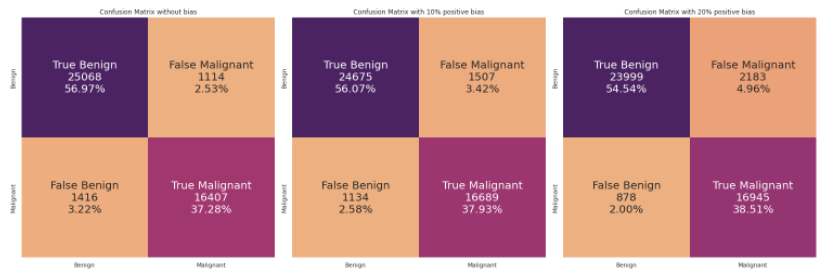

**Classification Report**

The report also indicates our model is correct 95% of the time, when it predicts a tumor is benign and 94% of the time, when it predicts a tumor is malignant.

Our model also correctly identifies 96% of benign tissues and 92% of malignant tissues.

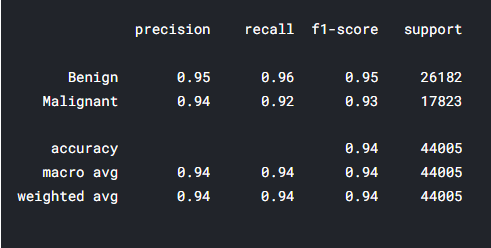

The entire code and results of our final model can be found here: **[Final_Model_Evaluation_Notebook](https://www.kaggle.com/lokanathpatro/team-4-final-model-evaluation-notebook)**

# **Conclusion**

At the end of our work, we were able to create several convolutional neural network models or algorithms that can be used to detect metastatic cancer in histopathological image scans. We used the pre-trained VGG16 model to build our best model. We achieved an accuracy of 94% and an AUC score of 0.98 with this model.  
On this Kaggle competition, our model achieved a private score of 0.9316 and a public score of 0.9449 on test data. We may obtain improved results by altering the network design/architecture and parameters.